In [5]:
import warnings
warnings.filterwarnings("ignore")

### 비지도 학습

- Target이 없는 데이터 분류하기
- 군집화와 차원축소 있음.

---
### 군집 알고리즘

- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 분류

In [6]:
import numpy as np

In [7]:
# npy는 numpy에서 쓰는 데이터 포맷이다
# 이미지 데이터 처리할때는 npy를 많이 쓴다

In [8]:
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

> 흑백이미지  
> 300개의 이미지가 100*100 픽셀로 구성되어 있음  
> 100개는 사과, 100개는 파인애플, 100개는 바나나  

In [9]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

In [10]:
#!pip install matplotlib

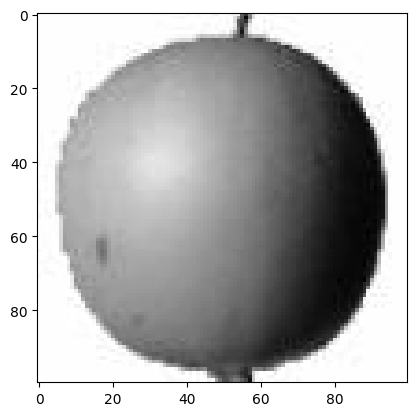

In [11]:
# 사과 이미지 보기

import matplotlib.pyplot as plt

plt.imshow(fruits[0], cmap="gray_r") # color값 뒤에 _r를 붙이면 흑과 백이 바뀜
plt.show()

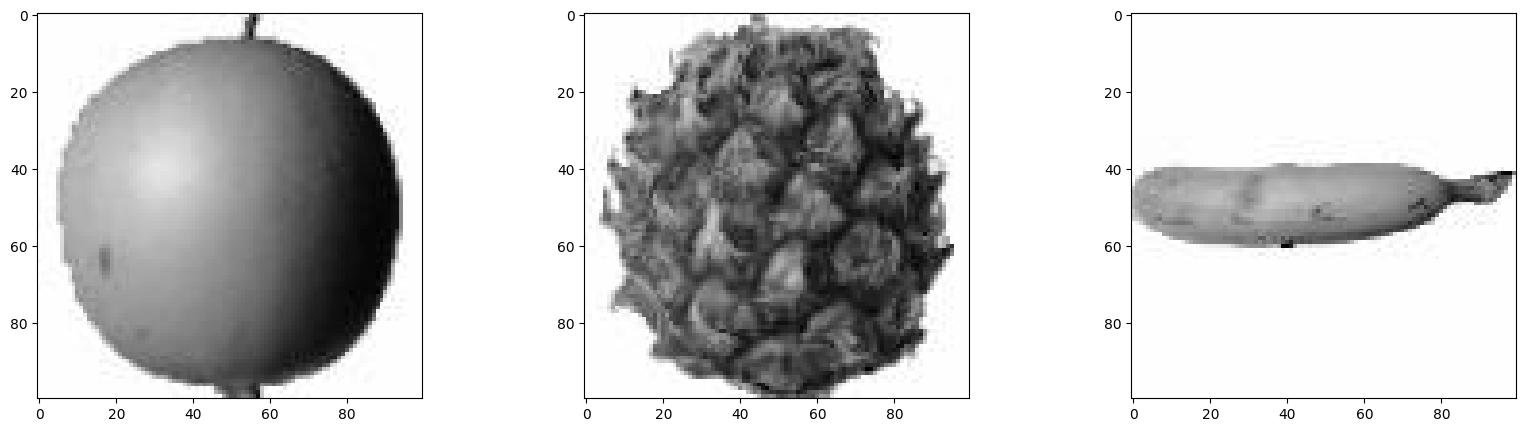

In [12]:
# 사과 파인애플 바나나 이미지 한번에 띄우기

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(fruits[0], cmap="gray_r")
axs[1].imshow(fruits[100], cmap="gray_r")
axs[2].imshow(fruits[200], cmap="gray_r")
plt.show()

### 샘플 차원 변경하기

- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경하기
- 배열중 page단에 수는 apple, pineapple, banana로 변경

In [13]:
apple = fruits[0:100].reshape(-1, 100*100) # 행과 열을 합친다
pineapple = fruits[100:200].reshape(-1, 100*100) # 행과 열을 합친다
banana = fruits[200:300].reshape(-1, 100*100) # 행과 열을 합친다

In [14]:
# 잘 바꼈나 확인

apple.shape

(100, 10000)

### 픽셀 값 분석하기

In [15]:
# apple의 sample별(행별) 평균 구하기

np.mean(apple, axis=1)
# np.mean(np.mean(apple, axis=1)) # 평균의 평균

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

In [16]:
np.mean(banana, axis=1)

array([19.6562, 24.5662, 36.8766, 18.6601, 53.6558, 31.7044, 51.9657,
       28.5927, 23.9271, 32.2568, 29.258 , 24.7185, 27.8753, 41.4379,
       61.1718, 32.8263, 38.5741, 30.5538, 30.2259, 21.5571, 32.7725,
       39.7495, 47.9444, 57.8857, 33.782 , 23.6046, 49.8249, 44.1985,
       46.2651, 33.6805, 36.1886, 69.1677, 34.0441, 33.005 , 60.3284,
       33.1187, 45.4309, 56.2518, 37.0371, 25.7959, 32.8392, 29.1431,
       57.8126, 44.749 , 31.2881, 29.965 , 41.045 , 23.8932, 43.2136,
       32.5144, 26.1811, 55.6772, 22.3343, 29.6437, 24.1837, 22.714 ,
       24.3289, 46.3985, 32.1923, 42.6475, 44.6537, 24.1214, 27.778 ,
       32.4904, 19.3099, 22.5723, 19.769 , 26.297 , 25.8821, 25.3296,
       26.53  , 35.018 , 28.6522, 80.9907, 37.0376, 47.5271, 18.886 ,
       33.1672, 37.9424, 34.9369, 33.6976, 24.5432, 32.8786, 19.8387,
       32.6769, 28.6619, 23.2095, 26.4962, 27.3008, 38.8501, 18.8745,
       30.3564, 54.4535, 38.0472, 32.3986, 31.2098, 33.322 , 37.6796,
       38.2613, 26.4

In [17]:
np.mean(pineapple, axis=1)

array([ 99.4591,  87.2813,  97.266 ,  97.6249,  99.0985,  98.0204,
        95.3268,  93.068 ,  95.9637,  97.0517,  93.3934, 101.428 ,
        91.7546,  98.5482,  84.4958, 100.8403,  99.0875,  87.6621,
        99.5753,  91.9889,  90.4777,  99.697 ,  96.0268,  96.2358,
       100.0995,  95.7049,  95.4074,  98.3442,  93.2153,  99.3216,
       100.0574,  96.8602,  94.2984, 100.9009, 101.2138,  98.3898,
        98.6667, 101.5013,  95.6774,  93.2382,  87.7362,  93.8681,
        94.8107,  85.668 ,  95.2649,  95.4872,  92.9085,  94.56  ,
        99.5211,  96.0159,  97.9703,  99.5309,  99.4664,  95.2117,
        97.7504,  97.5628,  99.6191,  97.4884, 101.1579,  91.3542,
        95.4344,  95.5562, 101.6025,  97.7423,  99.0284,  96.8987,
        98.4363,  96.5558,  82.0594,  93.6527,  97.5518,  82.5908,
        95.5165,  95.413 , 101.4735,  97.3823,  95.6147, 100.7766,
       100.4139,  94.3745,  95.9177,  97.2533,  97.0768,  93.0063,
        97.5927, 100.9398,  98.0153,  99.3897, 101.2213,  94.9

In [18]:
# 분석은 무조건 그래프다

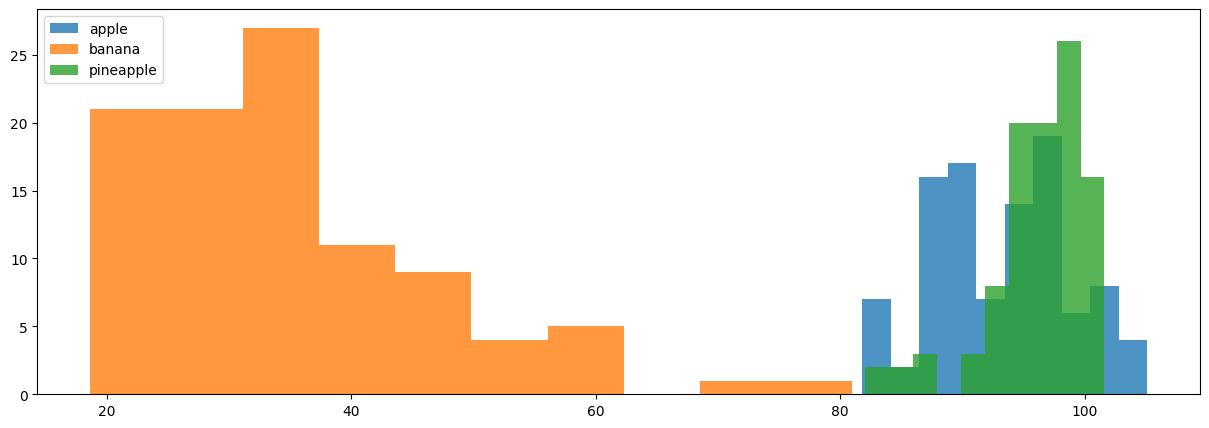

In [19]:
# 과일별 빈도수를 히스토그램으로 표현하기

plt.figure(figsize=(15,5))
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)

plt.legend(["apple","banana","pineapple"])
plt.show()

# apple하고 banana는 구분할수 있지만 apple과 pineapple은 겹치는 부분이 많다

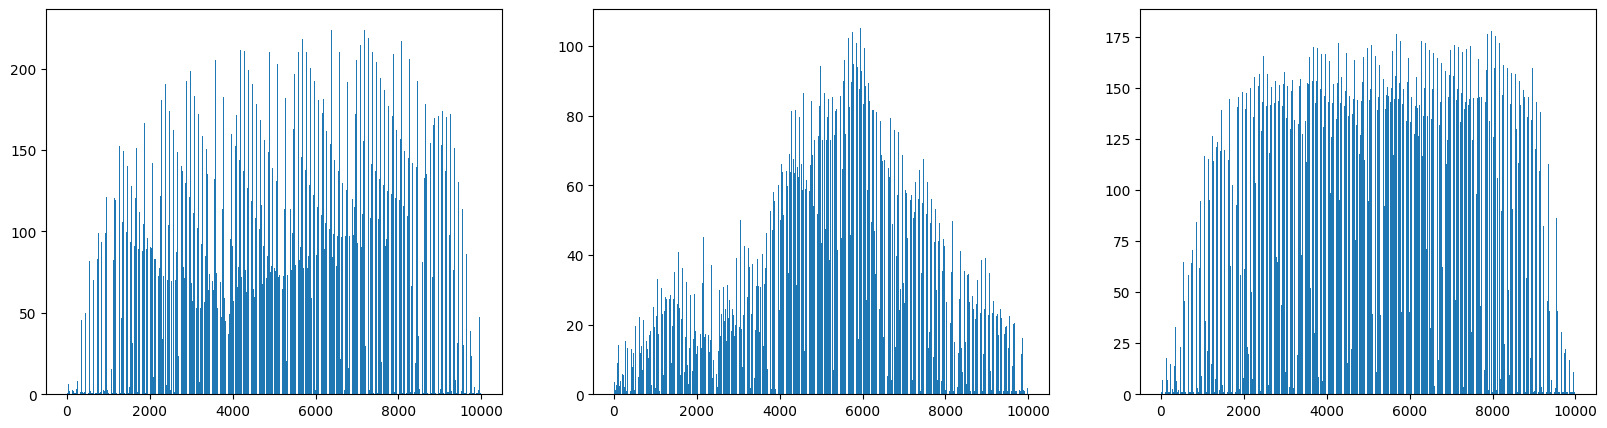

In [20]:
# Feature별 평균 막대그래프

fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(banana, axis=0))
axs[2].bar(range(10000), np.mean(pineapple, axis=0))

plt.show()

### 평균 이미지 그림 표현하기 : 2차원 배열로 변경

In [21]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)

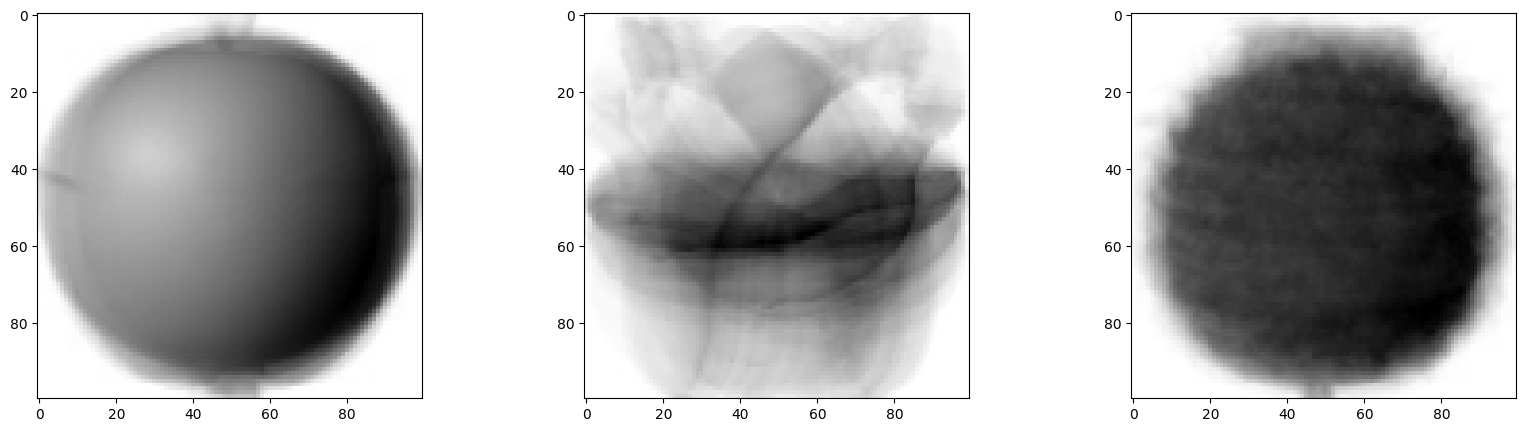

In [22]:
# Feature별 평균 막대그래프

fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(banana_mean, cmap='gray_r')
axs[2].imshow(pineapple_mean, cmap='gray_r')

plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이밎와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다
- 사과만 잘 분류하는지 시도

In [23]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만 구한다
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열 

(300,)

In [24]:
#fruits.shape # 3차원은 빼고(300 빼고), (100,100) 2차원으로 가져가기 위해
# 0:300 , 1:100 , 2:100 axis=(1,2)로 사용 

In [25]:
# 300개의 데이터중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.
apple_index = np.argsort(abs_mean)[:100]

In [26]:
# 그림 그려보기
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off')

plt.show()

### 바나나로 확인해보기 

In [ ]:
abs_diff = np.abs(fruits - banana_mean) # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만 구한다
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열 
# 300개의 데이터중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.
banana_index = np.argsort(abs_mean)[:100]

In [ ]:
# 그림 그려보기
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off')

plt.show()